## Les 3 Definities, recursie en random

In deze laatste intro les leer je kennis maken met het gebruik van definities, en als link naar de wiskunde D lessen kijken we naar recursie en kansrekening. Ook komt plotten kort aan bod.

Je leert:
- wat een definitie is en hoe je het kan gebruiken
- wat recursie is als definitie 
- gebruik maken van de bibliotheek random voor willekeurige getallen
- gebruik maken van de bibliotheek matplotlib voor het maken van plots ('grafieken')




# Definities

In les 1 en vooral les 2 heb je een paar programma's leren schrijven. Soms wil je later een stukje code herhalen. Denk bijvoorbeeld aan het mkaen van een lijst van priemgetallen die aan een bepaalde voorwaarde voldoet. Je wilt dan niet steeds het stukje code herhalen om te bepalen of een getal een priemgetal is. Daar komen definities bij kijken.

Een functie definieer je altijd aan het begin van je code, zodat deze eerst gelezen wordt voordat deze wordt toegepast. dat doe je met `def functienaam(variabele1, variabele2, etc)`.
Deze functie heeft een output, dat kunnen getallen, lijsten, of booleaanse variabelen zijn

Later kan je de functie dan oproepen en daar een waarde in proppen en komt een waarde uit.

Als voorbeeld nemen we weer die priemgetallen (zie les 2), dat als input een `getal` heeft en als output `True` als het een priem is, en `False` als dat niet zo is.

In [ ]:
import math  #deze hebben we nodig voor de wortelfunctie

def is_priemgetal(getal):    #we DEFinieren een functie, genaamd is_priem, dat als input een getal heeft:

    #nu een programma om te controleren 
    # Getallen kleiner dan 2 zijn geen priemgetallen
    if getal < 2:
        return False
    
    # 2 is het enige even priemgetal
    if getal==2:
        return True
    if getal%2==0:
        return False

    # We checken alleen de oneven getallen tot de wortel van het getal
    for deler in range(3, int(math.sqrt(getal)) + 1, 2):  #de getallen 3 tot en met de wortelvan getal gaan we af
        if getal % deler == 0:
            return False
            
    return True


#test het programma uit, verander eventueel zelf de waarde:
nummer = 1251

if is_priemgetal(nummer):    # als dit waar is, print dat dat het een priemgetal is
    print(f"{nummer} is een priemgetal!")
else:                        # als er False uit komt, gaat deze else af:
    print(f"{nummer} is geen priemgetal.")

1251 is geen priemgetal.


Zoals je ziet wordt in bovenste deel van de code getest of getal een priemgetal is, en pas onderaan aangeroepen.  Dit is voor steeds groter wordende programma's erg handig middel, omdat je dan enkel stukjes programma hoeft toe te voegen en onderaan pas op te roepen. Dit maakt het lezen van het programma ook makkelijker, en had je eerder een werkend programma maar na het toevoegen van een nieuwe functie foutmeldingen, weet je zeker dat het aan je nieuwe functie ligt en niet aan alle andere stukken code.


# Recursie!
Je kan ook functies binnen functies aanroepen, dat heet recursie, wat ongeveer wat je ook bij wiskunde D al hebt gezien. 
We beginnen met een eenvoudige recursieformule, de faculteit.
De faculteit is gedefinieerd als: n! = n x (n-1) x (n-2) x ... x 3 x 2 x 1

Dit is ook een voorbeeld van een algoritme. En je kan dit op meerdere manier programmeren
De eerste manier is met een for loop: n! = 1 x 2 x 3 x...x (n-2) x x(n-1) x n
Begin met 1 en vermenigvuldig de volgende waarde met de vorige uitkomsten.

Manier 2 maakt gebruik van het feit dat n! = n*(n-1)!

Hieronder beide manieren uitgewerkt:


In [28]:
#Manier 1:
def faculteitmanier1(getal):
    faculteit = 1
    for i in range(1,getal+1):
        faculteit = i*faculteit
    
    return faculteit

n=5
print(f"{n}!={faculteitmanier1(n)}")

5!=120


In [30]:
#manier 2:
# n! = n(n-1)!
def faculteit(n):
    if n <= 1:
        return 1    #we starten in principe met willekeurige n, maar als we bij 1 zijn uitgekomen, dan stoppen we.
    else:
        return n * faculteit(n - 1) #als n niet 1 is, dan verlagen we n en doen we het opnieuw.

# Test
getal = 3
resultaat = faculteit(getal)
print(f"{getal}! = {resultaat}")

3! = 6


Manier 2 vergt iets meer toelichting, wat doet `return n * faculteit(n - 1) ` nou eigenlijk, en hoe denkt python hierover.

Laten we een klein voorbeeld nemen, wat is 3! ofwel faculteit(3).
n=3 dus, het is niet kleiner dan 1, dus (else) onthoud de computer de waarde 3*faculteit(2), het weet echter niet wat faculteit(2) is.
n=2 nu dus, is ook niet kleiner gelijk 1, dus onthoud de computer de waarde 2*faculteit(1), maar het weet nog niet wat faculteit(1) is.
n=1 nu, maar deze is gelijk aan 1, dus geeft de waarde 1 terug. dus faculteit(1)=1. 
Dan gaat computer weer terug 'omhoog', dus `2*faculteit(1)` uitrekenen, dat is `2*1` nu, dus `return 2` geeft twee terug, maw faculteit(2)=2
Dan nog een stapje omhoog `3*faculteit(2)`, dat is nu gelijk aan 3*2, dus 6. Dus `faculteit(3)` geeft inderdaad 6 terug.

Test het uit met n=5 of hogere waarden.



# Andere recursie formules
Bij wiskunde D heb je al kennis gemaakt met recursieve formules, van de vorm u(n)=A*u(n-1)+B met startwaarde u0
Laten we dit ook proberen te programmeren, zoals dat ook in je GR eigenlijk gebeurd. Hieronder een voorbeeld met u(n)=1.05*u(n-1)+20.
Dezelfde logica met faculteit wordt gebruikt om bijvoorbeeld u(5) uit te kunnen rekenen, de computer onthoud achtereenvolgens:
1.05*u(4)+20
1.05*u(3)+20
1.05*u(2)+20
1.05*u(1)+20
1.05*u(0)+20
Bij u(0) uitgekomen komt er 100 voor inde plaats, dan wordt 1.05*100+20 uitgerekend en zo voorts.



In [31]:
def u(n):
    if n == 0:
        return 100  # De beginwaarde (u0)
    else:
        return 1.05 * u(n - 1)+20
    

print(u(5))

238.14078125000003


Laten we gelijk les 1 en 2 er bij betrekken en hier een rij van maken (tabel). Stel je wilt een lijst van u(0) tot u(9) maken. Dat kan als volgt.
Om het behapbaar te maken hebben we de functie veranderd, kan je bedenken waarin?

In [33]:
def u(n):
    if n == 0:
        return 4  # De beginwaarde (u0)
    else:
        return 2 * u(n - 1)+1
    

lijst = []
for i in range(0,10):
    lijst.append(u(i))

print(lijst)

[4, 9, 19, 39, 79, 159, 319, 639, 1279, 2559]


# Koppeling met de kansrekening hoofdstukken van Wiskunde D

Bij wiskunde D heb je hoofdstuk 1 en 3 gehad als het goed is, over combinaties permutaties en over kansbegrip, waaronder empirische kansen.

Laten we beginnen met combinatoriek. Je hebt daar bijvoorbeeld het aantal combinaties van 3 uit 15 gehad, bijvoorbeeld uit een groep van 15 leerlingen er 3 kiest, zonder dat volgorde van belang is.  Of als volgorde juist wel van belang is, dan was het het aantal permutaties.
In je GR kon je met permute(3,15) dit laatste uitrekenen. Omdat dit niet erg lastig is, zal dat een van de oefenopdrachten zijn.

Iets bewerkelijker is de combinatie(15,3) opdracht (15 boven 3), laten we die hieronder doornemen.
Herinner dat de combinaties k kiezen uit n, ofwel 'n boven k' gelijk is aan n! / ( k! (n-k!)). Erg handig om nu dus de definities te hergebruiken.

In [ ]:
def faculteit(n):
    if n <= 1:
        return 1    
    else:
        return n * faculteit(n - 1) 

def combinatie(n,k):   #bereken n boven k
    result = faculteit(n)/(faculteit(k)*faculteit(n-k))
    return int(result)   #we gebruiken int() om van het antwoord een geheel getal te maken, mocht dat later nodig zijn

#Test
combinatie(15,3)

455

# De random module

Ook heb je geleerd over empirische kansen, dat wilt zeggen de kans op een gebeurtenis gebaseerd op onderzoek. We kunnen met python dit simuleren door random getallen te genereren, via de module `import random`.

Laten we eenvoudig beginnen: het n maal dobbelen van 1 dobbelsteen, en we willen de lijst van resultaten hebben:


In [ ]:
import random

def dobbelworp(n):   #genereer een rij van n dobbelworpen
    worpen = []
    for i in range(0,n):
        worpen.append(random.randint(1,6))   #met random.randint genereer je een random getal tussen 1 en 6
    return worpen

resultaat = dobbelworp(50)


[1, 1, 4, 7, 5]


Hierboven wordt een lijst van 50 dobbelworpen bijgehouden. We willen graag weten hoe vaak elke waarde is voorgekomen in die lijst, ten opzichte van de lengte van die lijst. Dat is dan de kans. P(x=1) is dan de kans dat er op basis van deze dobbelsteen de waarde 1 uit komt.

Om te tellen zijn verschillende manieren, maar omdat deze les al wat lang wordt maken het makkelijk, de optie `count` telt het aantal keren dat een waarde voorkomt in een lijst

In [47]:
import random

def dobbelworp(n):   #genereer een rij van n dobbelworpen
    worpen = []
    for i in range(0,n):
        worpen.append(random.randint(1,6))   #met random.randint genereer je een random getal tussen 1 en 6
    return worpen

resultaat = dobbelworp(570)
for getal in range(1,7):
    frequenties = resultaat.count(getal)
    kans = frequenties/len(resultaat)    # het aantal keren dat een getal voorkomt, gedeeld door de lengte van de lijst, ofwel het totaal aantal worpen
    print(f"P(X={getal})={kans:.3f}")    #zie les 1, we ronden hier de kans op 3 decimalen af



P(X=1)=0.158
P(X=2)=0.165
P(X=3)=0.168
P(X=4)=0.205
P(X=5)=0.168
P(X=6)=0.135


# PLOTTEN

Als extra ook hier een kort voorbeeld over hoe je kan plotten. Bij het vak natuurkunde ga je daar vooral mee aan de slag voor bijvoorbeeld het maken van (x,t) en (v,t) diagrammen. Wij kijken hier alleen naar het voorbeeld van kansrekenen/ histogram maken en  recursieve rijen weergeven als grafiek.

Je hebt nodig de `matplotlib` module, die we als een andere naam definieren omdat het anders te veel typen is. Zie de eerste regel hieronder.
We maken van de dobbelsteenworpen een histogram.  Het eerste stukje, datageneren, is copy paste van hierboven.
Het histogram maken zelf spreekt vanzelf. `bins=[]` betekend voor welke intervallen je de frequenties wilt weergeven. Deze moet je 'eentje verder' doen, anders kapt de figuur te snel af (ik snap ook niet waarom).
De rest kan je zelf aanpassen om te kijken wat het doet, of gebruik chatgpt / gemini / google om erachter te komen wat je nog meer zou kunnen doen.

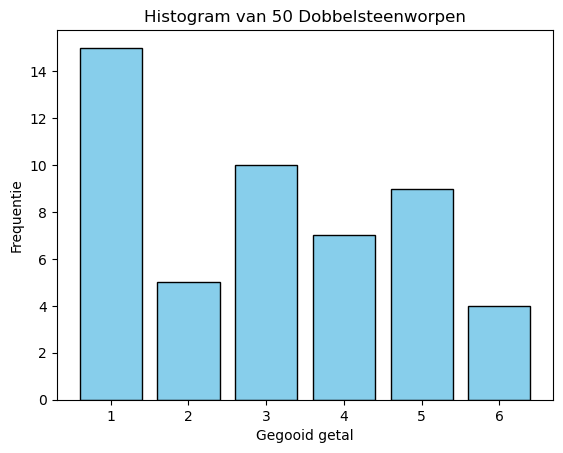

In [51]:

import random
import matplotlib.pyplot as plt

# 1. Data genereren:
def dobbelworp(n):   #genereer een rij van n dobbelworpen
    worpen = []
    for i in range(0,n):
        worpen.append(random.randint(1,6))   #met random.randint genereer je een random getal tussen 1 en 6
    return worpen


data = dobbelworp(50)

# 2. Histogram maken
plt.hist(data, bins=[1, 2, 3, 4, 5, 6, 7], align='left', rwidth=0.8, color='skyblue', edgecolor='black')

# 3. Opmaak van de grafiek
plt.title("Histogram van 50 Dobbelsteenworpen")
plt.xlabel("Gegooid getal")
plt.ylabel("Frequentie")
plt.xticks(range(1, 7)) # Zorgt dat 1 t/m 6 op de x-as staan

# 4. Tonen
plt.show()

Om een ander voorbeeld te maken, genereren we een grafiek van de eerste 20 termen van u(n)= -0.5 u(n-1)+1, met u(0)=1:


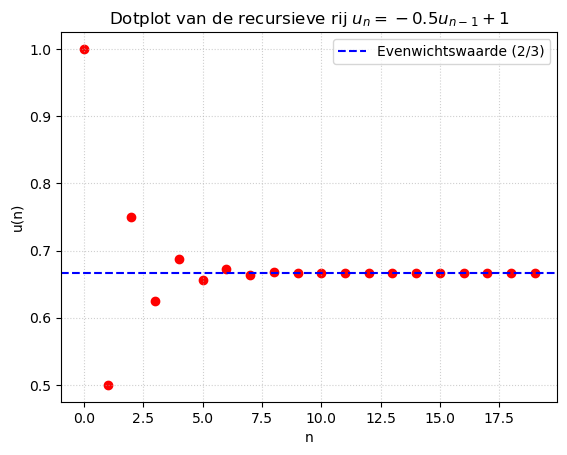

In [ ]:
import matplotlib.pyplot as plt

def u(n):
    if n == 0:
        return 1
    else:
        return -0.5 * u(n - 1) + 1

# 1. Genereer de data
n_waarden = list(range(20))
u_waarden=[]

for i in n_waarden:
    u_waarden.append(u(i))


# 2. Maak de dotplot (scatter)
plt.scatter(n_waarden, u_waarden, color='red', marker='o')

# 3. Voeg een horizontale lijn toe voor de grenswaarde (optioneel, extraatje)
plt.axhline(y=2/3, color='blue', linestyle='--', label='Evenwichtswaarde (2/3)')

# 4. Opmaak
plt.title("Dotplot van de recursieve rij $u_n = -0.5u_{n-1} + 1$")
plt.xlabel("n")
plt.ylabel("u(n)")
plt.grid(True, linestyle=':', alpha=0.6)
plt.legend()

# 5. Tonen
plt.show()

# OPDRACHTEN

Hieronder staan in de code weer een aantal opdrachten die je met de kennis van les 1, 2 en 3 moet kunnen maken.

In [ ]:
# definieer een functie oplossingen(a,b,c) dat van de kwadratische vergelijking ax^2 + bc+c de twee, een of geen oplossingen geeft, gebruik de discriminant (zie een eerdere oprdacht)
Hier een startje

def oplossingen(a,b,c):
    D = ...
    if D(>0):
        x1=...
        x2=...
        return x1,x2

    if(D==0):
        x1=...
        return x1
    if(D<0):
        print("geen oplossingen")


resultaat = oplossingen(1,2,-1)




In [ ]:
#Maak een histogram van: de som van het aantal ogen bij een worp van twee dobbelstenen, en herhaal dit experminent 100 keer.



In [ ]:
#Fibonacci: een fibonacci rij wordt gemaakt door de eerste en de twee term op te tellen om de derde term te krijgen. Elk volgende term is dan de voorgaande twee termen op te tellen.
#noem een functie fibo(n) dat de n-de fibonaccigetal geeft. Klassiek wordt de eerste twee startwaarden fibo(0)=1 en fibo(1) =1 genomen.
#Er geldt dus fibo(n)=fibo(n-1)+fibo(n-2): 1, 1, 2, 3, 5, 8, 13, 21, ...

#Doel: genereer een lijst van de eerste 20 fibonacci getallen.
#Maak vervolgens een lijst met opeenvolgende verhoudingen van fibonacciegetallen: fibo(n) / fibo(n-1)
#Kijk of dit naar een bepaalde waarde convergeert, maak daartoe een grafiek



In [ ]:
#Pi benaderen. Maak gebruik van random.rand() functie om pi te benaderen met de zogeheten monte carlo methode:
#genereer 1000 (of meer) getallen x, tussen -1 en 1.
#genereer 1000 of meer getallen y, tussen -1 en 1
#tel het aantal paren x en y, die binnen een cirkel van straal 1 rond de oorsprong liggen. (if math.sqrt(x**2+y**2)<1)
#
#bedenk hoe dit de waarde van pi kan benaderen

